In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
batch_size=32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        )

In [14]:
test_datagen=ImageDataGenerator(
        rescale=1./255
        )

In [15]:
train_generator=train_datagen.flow_from_directory(
    'G:\\asl_alphabet_train\\asl_alphabet_train',
    target_size=(256,256),  # all images will be resized to 150x150
    batch_size=batch_size,
    class_mode='categorical') 


Found 87000 images belonging to 29 classes.


In [18]:
train_generator

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [24]:
import matplotlib.pyplot as plt
import numpy as np
# Get a batch of images and labels from the generator
images, labels = next(train_generator)
#print(images) -> this will print array of all 32 images in the batch 
#print(labesl) -> this will print one hot encoded vector of all labels of these 32 images

In [37]:
len(labels[0])

29

In [30]:
np.argmax(labels, axis=1)

array([ 2,  9,  6,  7, 19, 10, 23, 27, 15,  9, 23, 21,  4,  0,  7, 18, 25,
        2, 26, 15, 18,  9,  1, 10, 14, 18, 26, 27,  3, 18,  4, 26],
      dtype=int64)

In [29]:
train_generator.class_indices.keys()

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

In [31]:
label_indices = np.argmax(labels, axis=1)
label_names = [list(train_generator.class_indices.keys())[i] for i in label_indices]
label_names

['C',
 'J',
 'G',
 'H',
 'T',
 'K',
 'X',
 'nothing',
 'P',
 'J',
 'X',
 'V',
 'E',
 'A',
 'H',
 'S',
 'Z',
 'C',
 'del',
 'P',
 'S',
 'J',
 'B',
 'K',
 'O',
 'S',
 'del',
 'nothing',
 'D',
 'S',
 'E',
 'del']

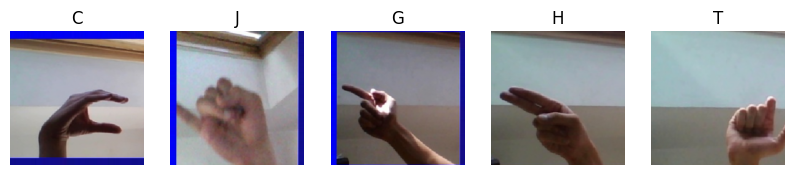

In [32]:
# Plot the first 5 images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(label_names[i])  # Use the category name as the title
    plt.axis('off')
plt.show()



In [38]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(29,activation='softmax'))


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 256, 256, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                      

In [40]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(train_generator,
                    epochs=5)

In [ ]:
#make prediction 
#1. save the model
from tensorflow.keras.models import load_model

model = load_model('path_to_your_model.h5')
import numpy as np

# Assuming you have a single image as input
# Preprocess the image (resize, normalize, etc.)
input_image = preprocess_input(image)

# Add a batch dimension (model expects input shape [batch_size, ...])
input_image = np.expand_dims(input_image, axis=0)

# Make a prediction
predictions = model.predict(input_image)